# Danh sách thành viên:
MSSV Họ và tên:
- 20133100	Lê Minh Trí
- 20133048	Vũ Xuân Huy
- 20133056 	Đỗ Trọng Khôi 

Khai phá dữ liệu phân tích việc huỷ hợp đồng của Khách hàng viễn thông

# Tập dữ liệu 
https://www.kaggle.com/code/bhartiprasad17/customer-churn-prediction/input

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

import plotly.express as px
import plotly.graph_objects as go
#import missingno as msno
import warnings
warnings.filterwarnings('ignore')

### Load Dữ liệu 


In [2]:
#loading data
df = pd.read_csv('./projectMining.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Làm sạch dữ liệu 

In [8]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [11]:
df[df['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

### Như có thể thấy với các hàng bị thiếu giá trị của cột 'TotalCharges' thì cột 'tenure' chỉ có giá trị là 0. Nên bước tiếp theo ta sẽ xóa các hàng có giá trị bị thiếu. Vì chỉ có 11 hàng nên là cũng sẽ không ảnh hưởng đến tập dữ liệu.

In [12]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

In [13]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,No,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [15]:
df["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [16]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [17]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [18]:
df['Contract']=df['Contract'].replace({'Month-to-month': 0, 'One year' : 1 , 'Two year' : 2})

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,0,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,1,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,0,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,0,Yes,Electronic check,70.70,151.65,Yes


In [20]:
df['Contract'].unique()

array([0, 1, 2], dtype=int64)

In [21]:
df.shape

(7032, 20)

In [22]:
#df.to_csv('./~$projectNhom19.csv')

In [23]:
#df.to_excel('./projectNhom19.xlsx')

## Tiến hành khai phá dữ liệu <br>
-Sự phân bổ tỷ lệ chấm dứt hợp đồng theo đặc điểm của khách hàng.


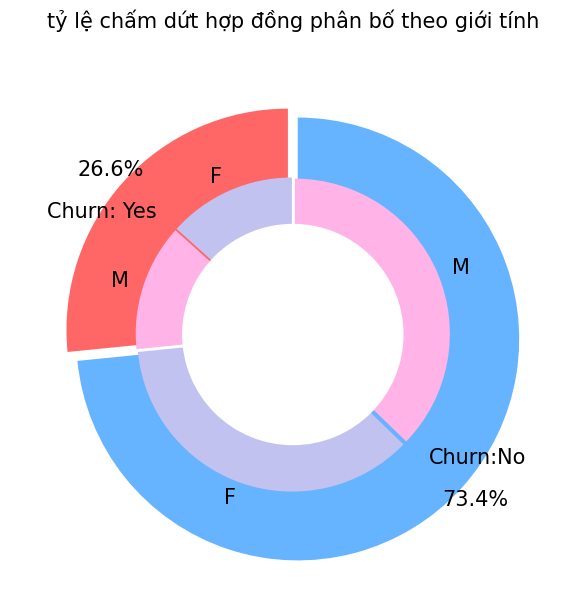

In [24]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('tỷ lệ chấm dứt hợp đồng phân bố theo giới tính', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

Nhận xét: tỷ lệ huỷ hợp đồng khá ít so với việc không huỷ và sự phân bố trên giới tính ở cả 2 khía cạnh tương đối bằng nhau, cho thấy việc chấm dứt hợp đồng không có liên quan nhiều đến giới tính

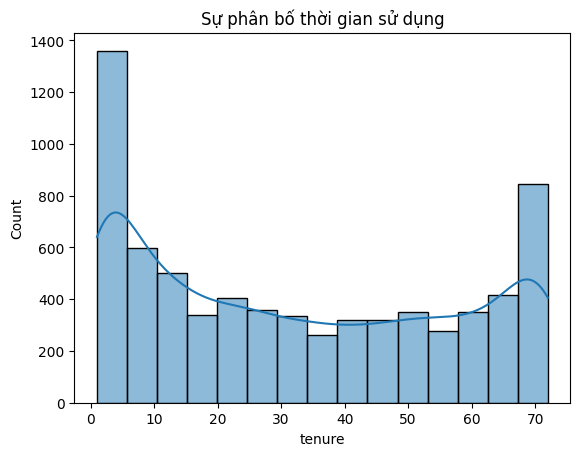

In [25]:
sns.histplot(data=df, x='tenure', kde=True)
plt.title("Sự phân bố thời gian sử dụng")
plt.show()

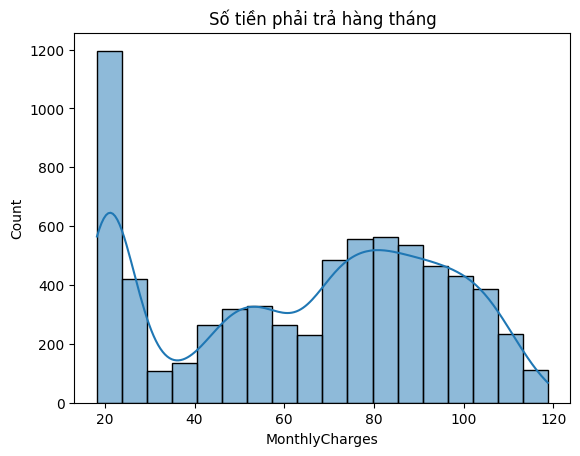

In [26]:
sns.histplot(data=df, x='MonthlyCharges', kde=True)
plt.title("Số tiền phải trả hàng tháng")
plt.show()

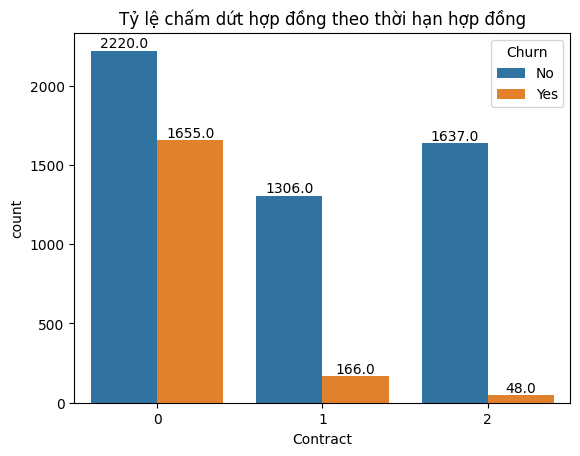

In [27]:
ax = sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Tỷ lệ chấm dứt hợp đồng theo thời hạn hợp đồng")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()

Nhận xét: Phần lớn việc chấm dứt hợp đồng xảy ra đối với những khách hàng đăng ký hợp đồng theo tháng

In [28]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Quan hệ giữa phương thức thanh toán và sự chấm dứt hợp đồng</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Nhận xét: Phần lớn trường hợp chấm dứt hợp đồng xảy ra khi người dùng thanh toán bằng Electronic check

In [29]:
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Việc chấm dứt hợp đồng với người có người phụ thuộc</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Nhận xét: việc có người phụ thuộc sẽ làm giảm đáng kể việc huỷ hợp đồng

In [30]:
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Việc chấm dứt hợp đồng với người có đối tác</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Nhận xét: người có đối tác sẽ ít khi huỷ hợp đồng hơn

In [31]:
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Việc chấm dứt hợp đồng với người cao tuổi</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Nhận xét: người cao tuổi ít ảnh hưởng đến việc huỷ hợp đồng

In [32]:
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Người sử dụng bảo vệ trực tuyến có chấm dứt hợp đồng không?</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Phần lớn trường hợp huỷ hợp đồng rơi vào các khách hàng không sử dụng dịch vụ bảo vệ trực tuyến

In [33]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Sự chấm dứt hợp đồng dựa trên việc sử dụng hỗ trợ kỹ thuật</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Phần lớn trường hợp huỷ hợp đồng rơi vào các khách hàng không sử dụng dịch vụ hỗ trợ kỹ thuật

In [34]:
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Việc chấm dứt hợp đồng theo việc sử dụng dịch vụ điện thoại </b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Phần lớn trường hợp huỷ hợp đồng rơi vào các khách hàng sử dụng dịch vụ di động

In [35]:
fig = px.histogram(df, x="Churn", color="InternetService", title="<b>Việc chấm dứt hợp đồng theo nhà cung cấp dịch vụ Internet </b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Phần lớn trường hợp huỷ hợp đồng rơi vào các khách hàng sử dụng dịch vụ internet là Fiber optic

In [37]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,0,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,1,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,0,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,0,Yes,Electronic check,70.70,151.65,Yes


### Phân cụm

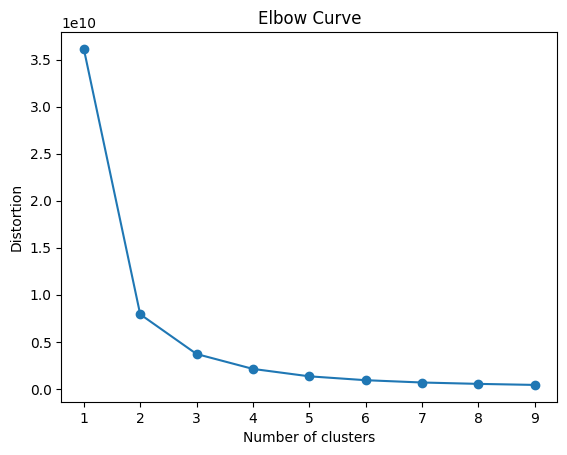

In [38]:
# Tính giá trị distortion cho từng số lượng cụm
dfKmean=df[['tenure','Contract','MonthlyCharges','TotalCharges']]
distortions = []
for k in range(1, 10):
    kp = KMeans(n_clusters=k,  max_iter=50)
    kp.fit(dfKmean)
    distortions.append(kp.inertia_)

# Vẽ đường cong Elbow
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()

In [39]:
# Silhouette analysis được sử dụng để đánh giá chất lượng của việc phân cụm
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]#Chọn danh sách các số lượng cụm ta cho là tối ưu
for num_clusters in range_n_clusters:# Lặp qua mỗi giá trị số lượng cụm trong danh sách
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)# Tạo mô hình kmean với số lượng cụm là biến lặp của vòng for và lần lặp 50 lần
    kmeans.fit(dfKmean) # Tiến hành phân cụm kmean trên tập dữ liệu rfm_df_scaled
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(dfKmean, cluster_labels)# tính toán điểm silhouette cho mỗi cụm
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg)) # in ra số cụm và điểm silhouette của mỗi số cụm đó. Điểm càng gần 1 thì số cụm đó càng tối ưu và càng gần -1 thì lại càng không tốt

For n_clusters=2, the silhouette score is 0.7029563538070672
For n_clusters=3, the silhouette score is 0.6445963450022758
For n_clusters=4, the silhouette score is 0.6019555730408738
For n_clusters=5, the silhouette score is 0.5964378159389042
For n_clusters=6, the silhouette score is 0.5934250950765682
For n_clusters=7, the silhouette score is 0.5840206772208723
For n_clusters=8, the silhouette score is 0.5696869004585676


In [40]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(dfKmean)

KMeans(max_iter=50, n_clusters=4)

In [41]:
dfKmean['Cluster_Id'] = kmeans.labels_ # tạo cột mới trong dataframe frm tên 'Cluster_Id' chứa tên cụm của mỗi giao dịch 
dfKmean.head()

,tenure,Contract,MonthlyCharges,TotalCharges,Cluster_Id
0,1,0,29.85,29.85,1
1,34,1,56.95,1889.50,3
2,2,0,53.85,108.15,1
3,45,1,42.30,1840.75,3
4,2,0,70.70,151.65,1


In [42]:
print('Contract')
print(dfKmean.groupby('Cluster_Id')['Contract'].describe())
print('tenure')
print(dfKmean.groupby('Cluster_Id')['tenure'].describe())
print('MonthlyCharges')
print(dfKmean.groupby('Cluster_Id')['MonthlyCharges'].describe())
print('TotalCharges')
print(dfKmean.groupby('Cluster_Id')['TotalCharges'].describe())


Contract
             count      mean       std  min  25%  50%  75%  max
Cluster_Id                                                     
0           1222.0  0.941899  0.821933  0.0  0.0  1.0  2.0  2.0
1           3127.0  0.356892  0.673915  0.0  0.0  0.0  0.0  2.0
2            982.0  1.409369  0.738786  0.0  1.0  2.0  2.0  2.0
3           1701.0  0.700176  0.827857  0.0  0.0  0.0  1.0  2.0
tenure
             count       mean        std   min   25%   50%   75%   max
Cluster_Id                                                            
0           1222.0  51.712766  11.372200  28.0  43.0  51.0  61.0  72.0
1           3127.0  11.746083  13.117418   1.0   2.0   7.0  15.0  62.0
2            982.0  66.264766   5.896072  48.0  62.0  68.0  71.0  72.0
3           1701.0  37.034098  18.046574  11.0  23.0  31.0  51.0  72.0
MonthlyCharges
             count        mean        std    min     25%      50%     75%  \
Cluster_Id                                                                  
0    

<Axes: xlabel='Cluster_Id', ylabel='tenure'>

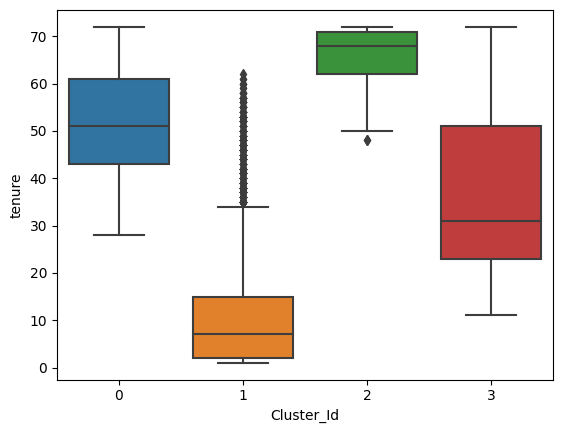

In [43]:
sns.boxplot(x='Cluster_Id', y='tenure', data=dfKmean)

<Axes: xlabel='Cluster_Id', ylabel='Contract'>

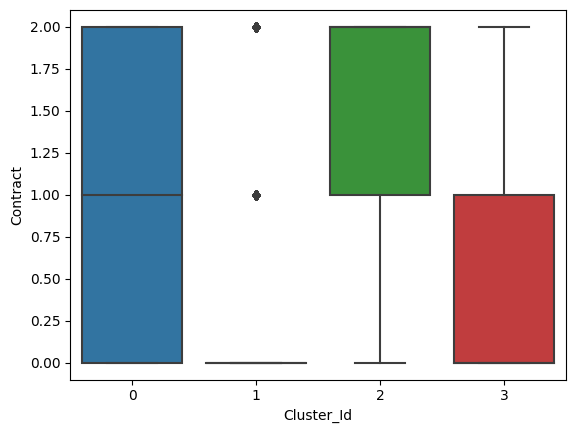

In [44]:
sns.boxplot(x='Cluster_Id', y='Contract', data=dfKmean)

<Axes: xlabel='Cluster_Id', ylabel='MonthlyCharges'>

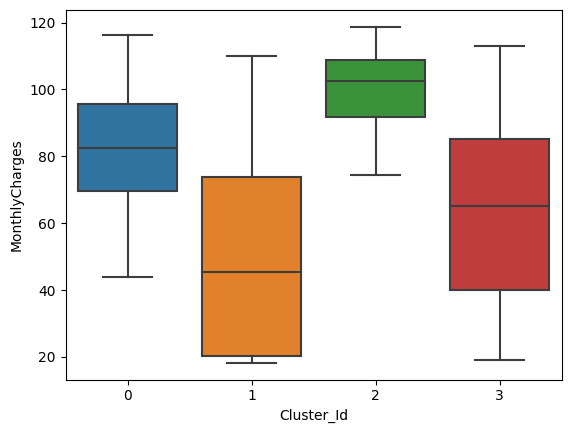

In [45]:
sns.boxplot(x='Cluster_Id', y='MonthlyCharges', data=dfKmean)

<Axes: xlabel='Cluster_Id', ylabel='TotalCharges'>

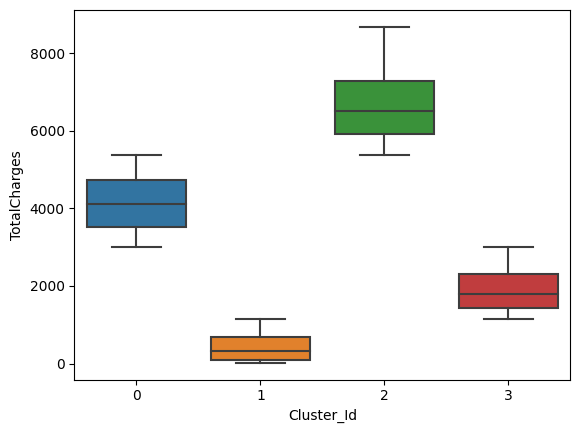

In [46]:
sns.boxplot(x='Cluster_Id', y='TotalCharges', data=dfKmean)

In [47]:
dfKmean1=df
dfKmean1['Cluster_Id']=kmeans.labels_
print(dfKmean1[dfKmean1['Churn'] == 'Yes'].groupby('Cluster_Id')['Churn'].value_counts())
print(dfKmean1[dfKmean1['Churn'] == 'No'].groupby('Cluster_Id')['Churn'].value_counts())

Cluster_Id  Churn
0           Yes       221
1           Yes      1135
2           Yes       129
3           Yes       384
Name: Churn, dtype: int64
Cluster_Id  Churn
0           No       1001
1           No       1992
2           No        853
3           No       1317
Name: Churn, dtype: int64


Việc phân cụm giúp ta xác định được 4 loại khách hàng với các đặc tính cơ bản, từ đó giúp ta thu hẹp phạm vi quan tâm và ra giải pháp giữ khách hàng theo từng loại.

### Phân loại

In [48]:
# Chuyển đổi các biến định danh thành dummies variables
dfLogistic=df
categorical_cols = ['gender', 'SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
dfLogistic = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Chia tập dữ liệu thành features (biến đầu vào) và target (biến đầu ra)
X = dfLogistic.drop('Churn', axis=1)
y = dfLogistic['Churn']

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình logistic regression
logreg = LogisticRegression()

# Huấn luyện mô hình
logreg.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
predictions = logreg.predict(X_test)

# Đánh giá hiệu suất
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.783226723525231


### Vận dụng mô hình

In [49]:
dfLogistic.head()

,tenure,Contract,MonthlyCharges,TotalCharges,Churn,Cluster_Id,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,29.85,29.85,No,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,34,1,56.95,1889.50,No,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0,53.85,108.15,Yes,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,1,42.30,1840.75,No,3,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2,0,70.70,151.65,Yes,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [50]:
dfLogistic['Contract'].values

array([0, 1, 0, ..., 0, 0, 2], dtype=int64)

In [51]:
dfLogisticTest=dfLogistic.drop('Churn', axis=1)

In [52]:
dfLogisticTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7032 non-null   int64  
 1   Contract                               7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Cluster_Id                             7032 non-null   int32  
 5   gender_Male                            7032 non-null   uint8  
 6   SeniorCitizen_Yes                      7032 non-null   uint8  
 7   Partner_Yes                            7032 non-null   uint8  
 8   Dependents_Yes                         7032 non-null   uint8  
 9   PhoneService_Yes                       7032 non-null   uint8  
 10  MultipleLines_No phone service         7032 non-null   uint8  
 11  Mult

In [60]:
new_data = {
    'tenure': 13,
    'Contract': 0,                                
    'MonthlyCharges':33.00,                            
    'TotalCharges' : 12.00 ,
    'Cluster_Id': 2    ,                                          
    'gender_Male':1      ,                        
    'SeniorCitizen_Yes': 2  ,                      
    'Partner_Yes': 0   ,                           
    'Dependents_Yes': 0,                           
    'PhoneService_Yes' : 0    ,                   
    'MultipleLines_No phone service': 1  ,         
    'MultipleLines_Yes': 0              ,          
    'InternetService_Fiber optic':1     ,        
    'InternetService_No': 0            ,           
    'OnlineSecurity_No internet service': 0 ,      
    'OnlineSecurity_Yes' :0                ,      
    'OnlineBackup_No internet service': 1    ,     
    'OnlineBackup_Yes' :0           ,             
    'DeviceProtection_No internet service':0  ,   
    'DeviceProtection_Yes' : 1       ,             
    'TechSupport_No internet service':1     ,     
    'TechSupport_Yes':0                     ,     
    'StreamingTV_No internet service':1     ,     
    'StreamingTV_Yes':0                     ,     
    'StreamingMovies_No internet service': 0 ,     
    'StreamingMovies_Yes': 1               ,       
    'PaperlessBilling_Yes':0                ,     
    'PaymentMethod_Credit card (automatic)':0 ,   
    'PaymentMethod_Electronic check':1      ,     
    'PaymentMethod_Mailed check':0              
}
df_new_customer = pd.DataFrame([new_data])

In [61]:

# Dự đoán trên khách hàng
prediction = logreg.predict(df_new_customer)

# In kết quả dự đoán
if prediction[0] == 'No':
    print("Khách hàng không huỷ hợp đồng.")
else:
    print("Khách hàng huỷ hợp đồng.")


Khách hàng huỷ hợp đồng.


In [55]:
newdata=dfLogisticTest.iloc[4]
newdata_2d = np.array(newdata).reshape(1, -1)
# Dự đoán trên khách hàng
prediction = logreg.predict(newdata_2d)

# In kết quả dự đoán
if prediction[0] == 'No':
    print("Khách hàng không huỷ hợp đồng.")
else:
    print("Khách hàng huỷ hợp đồng.")

Khách hàng huỷ hợp đồng.


### Luật kết hợp

In [56]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

dfassociate=df.drop('Cluster_Id',axis=1)
dfassociate=dfassociate.drop(['tenure','Contract','MonthlyCharges','TotalCharges'],axis=1)
# Áp dụng one-hot encoding cho các thuộc tính categorical
df_encoded = pd.get_dummies(dfassociate)
# Áp dụng thuật toán Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.45, use_colnames=True)

# Tạo các quy tắc association rule
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Hiển thị các quy tắc association rule
rules

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(gender_Male),(PhoneService_Yes),0.504693,0.903299,0.454778,0.901099,0.997564,-0.001110,0.977752,-0.004906
1,(Dependents_No),(SeniorCitizen_No),0.701507,0.837600,0.552048,0.786945,0.939524,-0.035534,0.762247,-0.177392
2,(SeniorCitizen_No),(PhoneService_Yes),0.837600,0.903299,0.755688,0.902207,0.998791,-0.000915,0.988833,-0.007398
3,(PhoneService_Yes),(SeniorCitizen_No),0.903299,0.837600,0.755688,0.836587,0.998791,-0.000915,0.993803,-0.012363
4,(PaperlessBilling_Yes),(SeniorCitizen_No),0.592719,0.837600,0.468146,0.789827,0.942965,-0.028316,0.772700,-0.129305
5,(Churn_No),(SeniorCitizen_No),0.734215,0.837600,0.639505,0.871005,1.039883,0.024527,1.258969,0.144301
6,(SeniorCitizen_No),(Churn_No),0.837600,0.734215,0.639505,0.763497,1.039883,0.024527,1.123814,0.236163
7,(Partner_No),(Dependents_No),0.517491,0.701507,0.466439,0.901347,1.284871,0.103415,3.025667,0.459498
8,(Partner_No),(PhoneService_Yes),0.517491,0.903299,0.464733,0.898049,0.994188,-0.002717,0.948502,-0.011971
9,(Dependents_No),(PhoneService_Yes),0.701507,0.903299,0.633817,0.903507,1.000230,0.000146,1.002153,0.000770


In [57]:
rule1=rules[['antecedents','consequents','support','confidence','lift']]

In [58]:
frequent_itemsets

,support,itemsets
0,0.495307,(gender_Female)
1,0.504693,(gender_Male)
2,0.837600,(SeniorCitizen_No)
3,0.517491,(Partner_No)
4,0.482509,(Partner_Yes)
5,0.701507,(Dependents_No)
6,0.903299,(PhoneService_Yes)
7,0.481371,(MultipleLines_No)
8,0.497298,(OnlineSecurity_No)
9,0.493743,(TechSupport_No)


In [59]:
df_encoded.head()

,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1,0,1,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,0,1,1,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
4,1,0,1,0,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1


Việc tìm ra quy luật kết hợp ở đây nhằm giúp phỏng đoán trước hướng phát triển trong đặc tính của khách hàng, qua đó xây dựng hướng đi nhằm phục vụ khách hàng tốt hơn